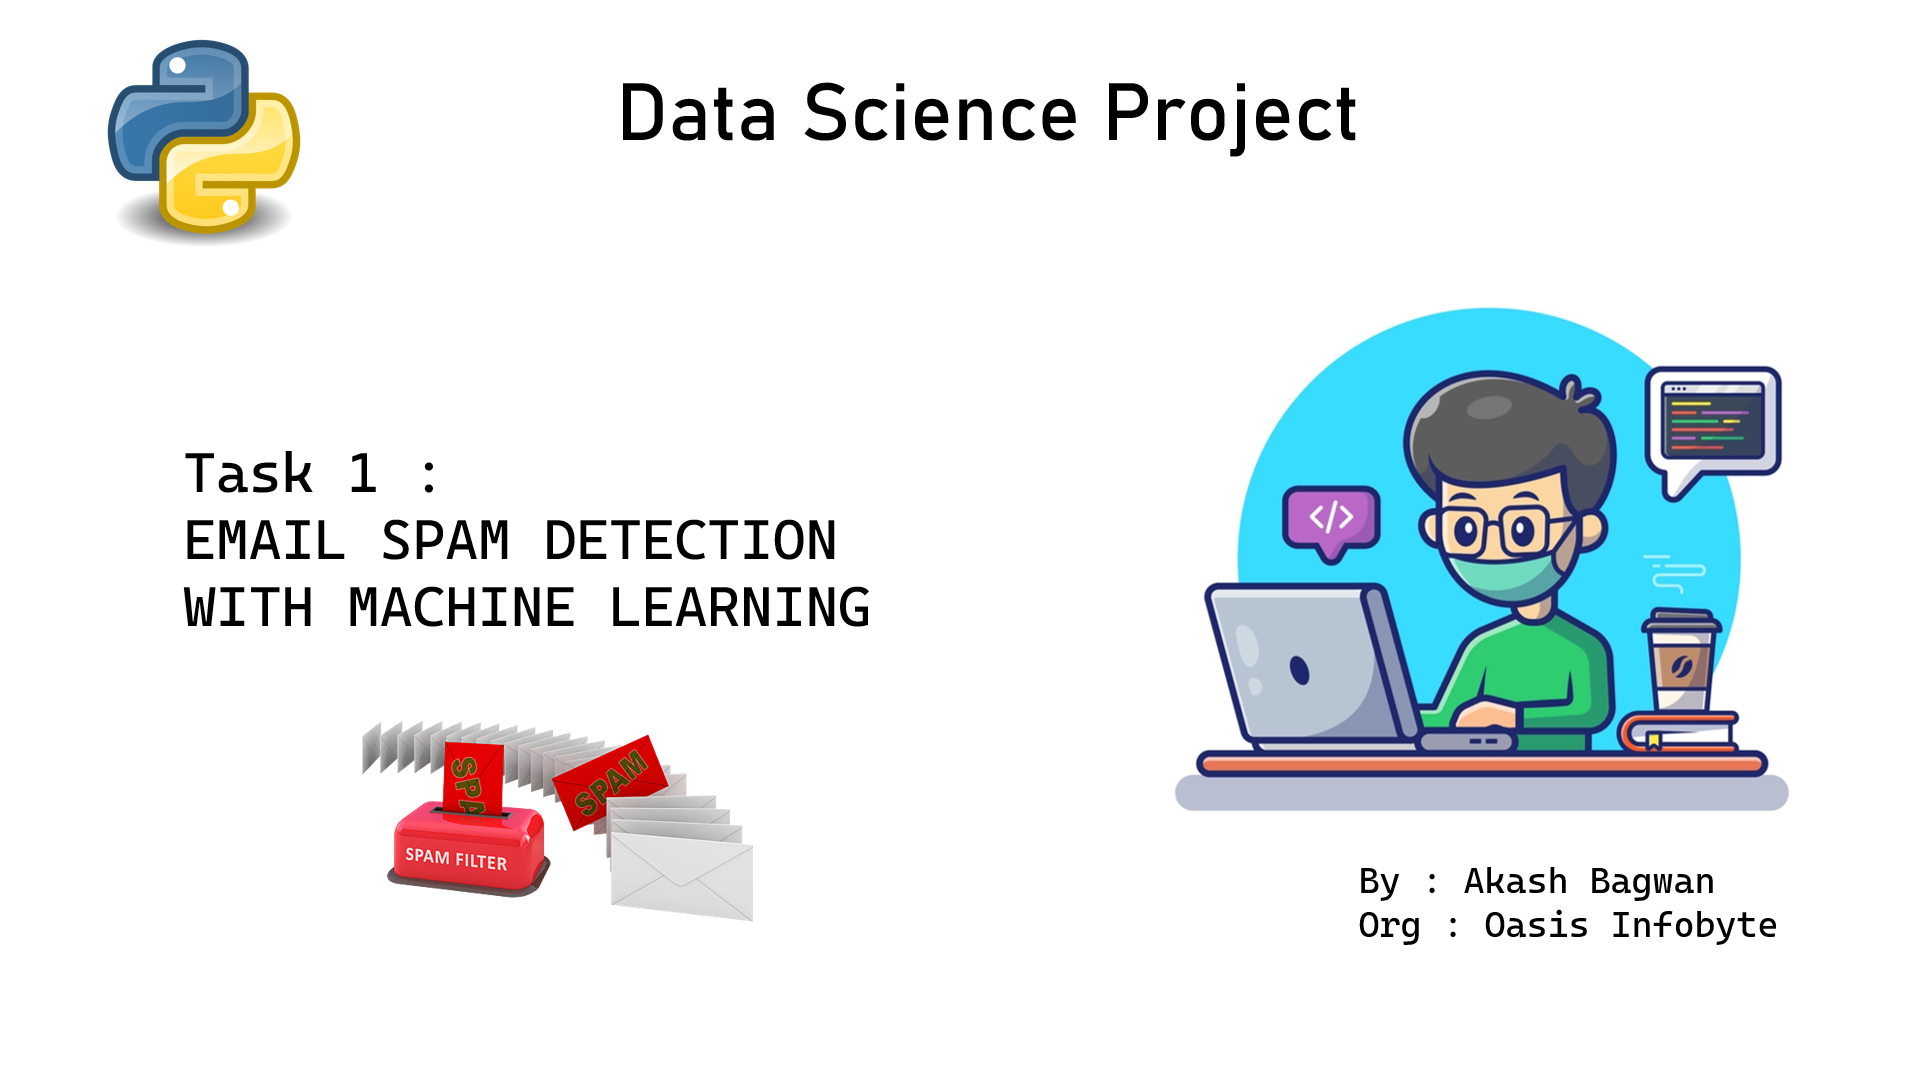

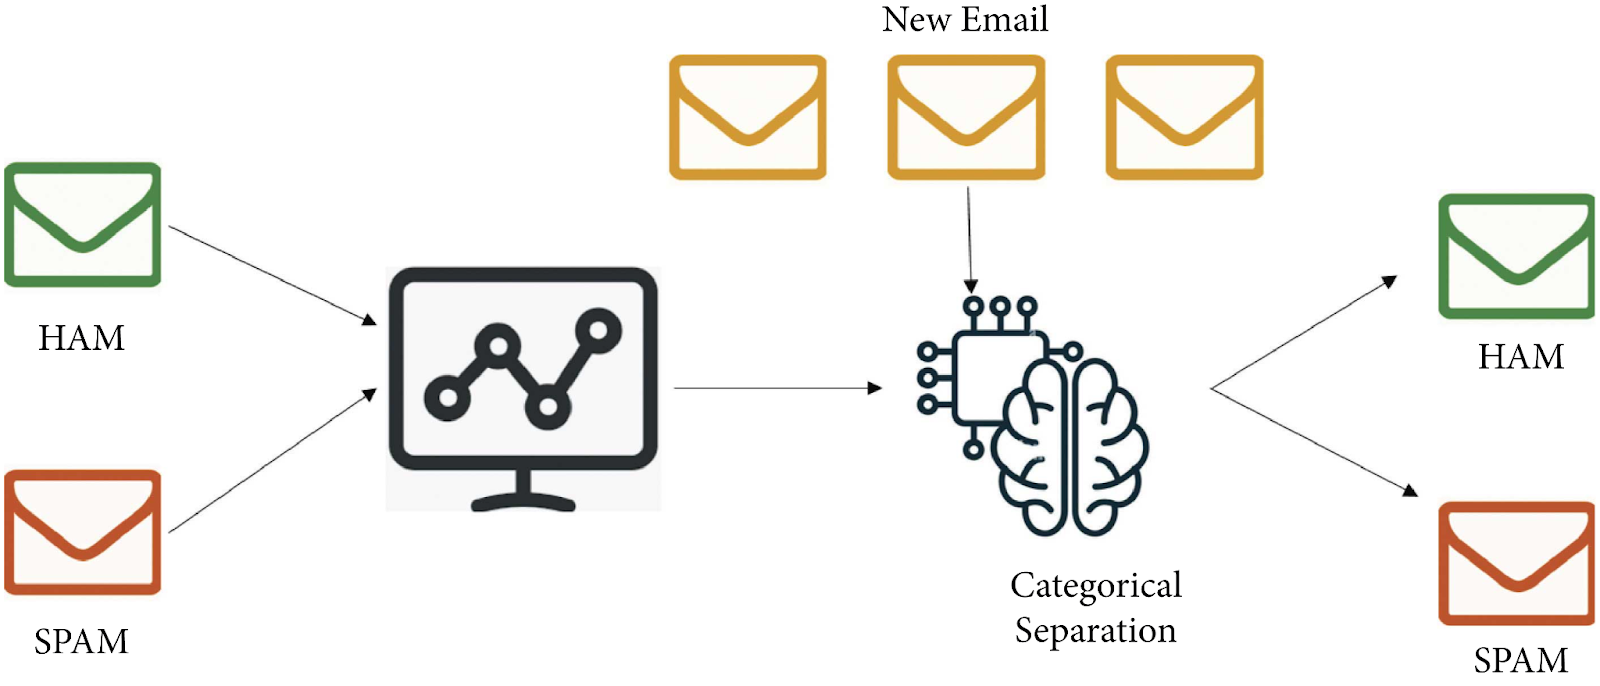

# Email Spam Detection By Machine Learning

In [1]:
import numpy as np
import pandas as pd
import sklearn
import streamlit as st

In [2]:
data= pd.read_csv('mail_data.csv')
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['Category']= data['Category'].map({'ham':0,'spam':1})

In [4]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer()

In [7]:
x= data['Message']
y= data['Category']

In [8]:
x.shape

(5572,)

In [9]:
y.shape

(5572,)

In [10]:
x= cv.fit_transform(x)

In [11]:
x

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
x_train.shape

(4457, 8709)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB()

In [17]:
model.fit(x_train,y_train)

MultinomialNB()

In [18]:
result = model.score(x_test,y_test)*100

In [19]:
result

97.30941704035875

In [20]:
import pickle

In [21]:
pickle.dump(model,open("spam.pkl","wb"))

In [22]:
pickle.dump(model,open("vectorizer.pkl","wb"))

In [23]:
clf = pickle.load(open("spam.pkl",'rb'))

In [24]:
clf

MultinomialNB()

In [25]:
msg = "Hello"
data =[msg]
vect = cv.transform(data).toarray()
result = model.predict(vect)
print(result)

[0]


In [26]:
msg = "You win 10 dollors"
data =[msg]
vect = cv.transform(data).toarray()
result = model.predict(vect)
print(result)

[1]


In [27]:
def main():
    st.title("Email Spam Classification Apps")
    st.subheader("Build with Streamlit & Python")
    msg = st.text_input("Enter a text :")
    if st.button('Predict'):
        data = [msg]
        vect = cv.transform(data).toarray()
        prediction = model.predict(vect)
        result = prediction[0]

        if result == 1:
            st.error("This is a spam mail")
        else:
            st.success("This is a ham mail")

main()

2023-07-04 13:38:56.104 
  command:

    streamlit run C:\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
